In [24]:
import os
os.getcwd()

'/Users/adebayojj/Desktop/GitHubProjects/kpi-dashboard-africa-smb/notebooks'

In [26]:
import os
os.listdir('../data')

['touch', 'README.md', 'financial_data.csv']

In [28]:
# Profit and Profit Margin
df['Profit'] = df['Revenue'] - df['Expenses']
df['Profit_Margin'] = df['Profit'] / df['Revenue']

# Net New Customers and Growth Rate
df['Net_New_Customers'] = df['New_Customers'] - df['Churned_Customers']
df['Customer_Growth_Rate'] = df['Net_New_Customers'] / df['Existing_Customers'].shift(1).fillna(1)

# CAC (assumed marketing cost)
marketing_cost = 3000
df['CAC'] = marketing_cost / df['New_Customers']

# LTV: avg revenue per customer * avg lifespan (assume 12 months)
avg_lifespan_months = 12
df['Revenue_per_Customer'] = df['Revenue'] / df['Existing_Customers']
df['LTV'] = df['Revenue_per_Customer'] * avg_lifespan_months

# Show KPIs
df[['Month', 'Revenue', 'Profit', 'Profit_Margin', 'CAC', 'LTV', 'Customer_Growth_Rate']].round(2)


,Month,Revenue,Profit,Profit_Margin,CAC,LTV,Customer_Growth_Rate
0,Jan-2023,10000,3000,0.30,60.00,1200.00,40.00
1,Feb-2023,12000,4500,0.38,50.00,1028.57,0.48
2,Mar-2023,15000,7000,0.47,42.86,957.45,0.39
3,Apr-2023,17000,8500,0.50,37.50,839.51,0.34
4,May-2023,20000,11000,0.55,33.33,784.31,0.29


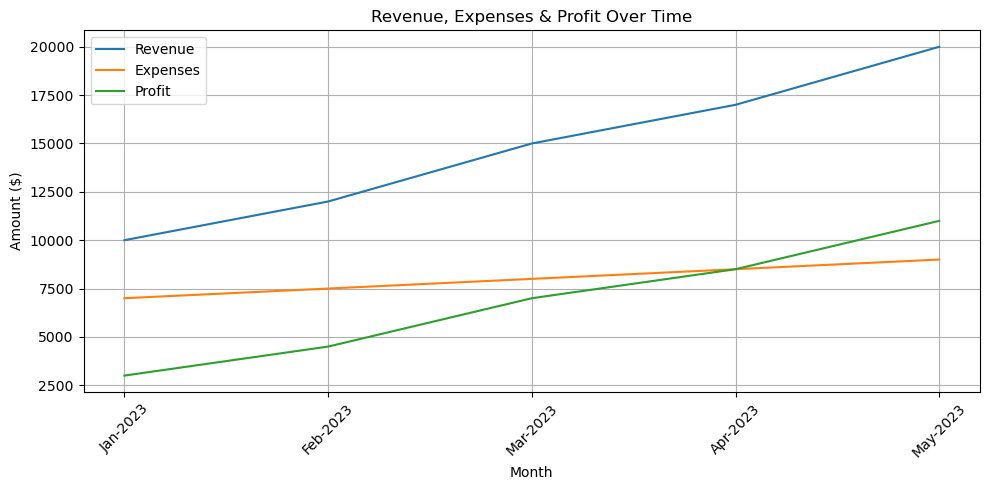

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Revenue'], label='Revenue')
plt.plot(df['Month'], df['Expenses'], label='Expenses')
plt.plot(df['Month'], df['Profit'], label='Profit')
plt.title('Revenue, Expenses & Profit Over Time')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


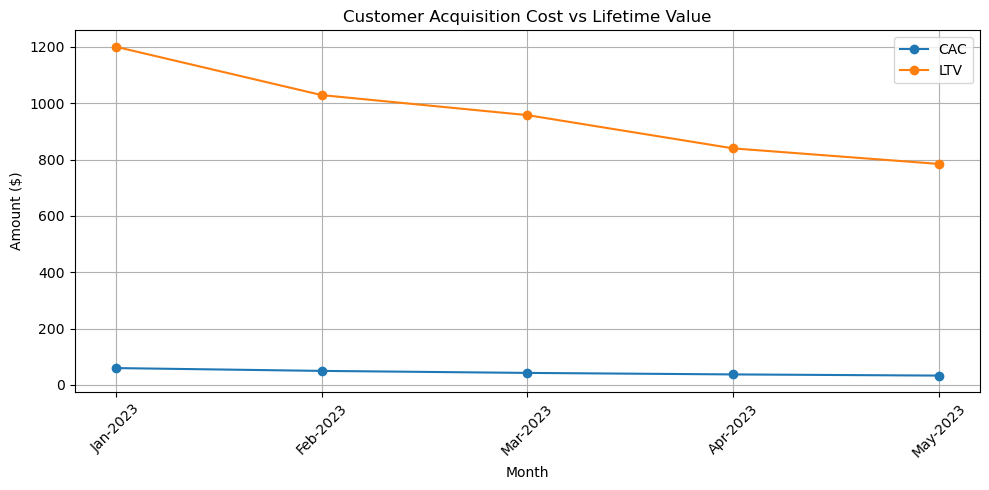

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['CAC'], marker='o', label='CAC')
plt.plot(df['Month'], df['LTV'], marker='o', label='LTV')
plt.title('Customer Acquisition Cost vs Lifetime Value')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()